Dependencies

In [44]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Preprocessing

In [114]:
import pathlib

dirname = os.path.dirname(pathlib.Path().resolve())
filename = "data\housing_price_dataset.csv"
data = pd.read_csv(os.path.join(dirname, filename))

data.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [47]:
def map_values(value):
    if (value == 'Rural'):
        return 0
    elif (value == 'Suburb'):
        return 1
    elif (value == 'Urban'):
        return 2
    return 3


In [48]:
data['Neighborhood'] = data['Neighborhood'].astype('str').map(map_values)


In [57]:
from sklearn.model_selection import train_test_split

## Test data
train, test = train_test_split(data, test_size=0.15, random_state=42)

## Validation data
labels = train['Price']
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.15, random_state=42)


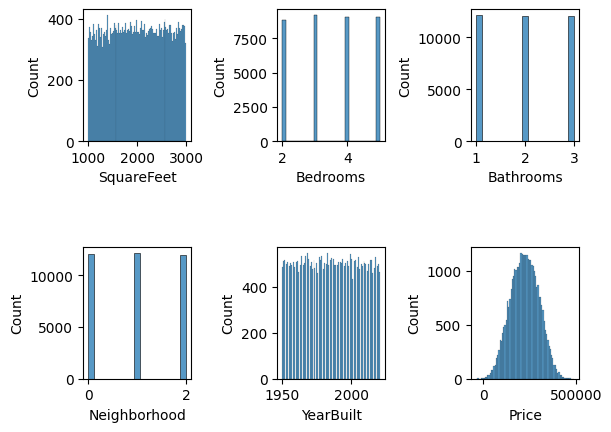

In [116]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
ax = fig.add_subplot(2, 3, 1)
sns.histplot(X_train["SquareFeet"], bins = 100, ax=ax)
ax = fig.add_subplot(2, 3, 2)
sns.histplot(X_train["Bedrooms"], ax=ax)
ax = fig.add_subplot(2, 3, 3)
sns.histplot(X_train["Bathrooms"],ax=ax)
ax = fig.add_subplot(2, 3, 4)
sns.histplot(X_train["Neighborhood"],ax=ax)
ax = fig.add_subplot(2, 3, 5)
sns.histplot(X_train["YearBuilt"], bins = 100,ax=ax)
ax = fig.add_subplot(2, 3, 6)
sns.histplot(y_train, ax=ax)
plt.show()

In [78]:
print(X_train.isna().any(axis=0))
print(X_train.isnull().any(axis=0))

SquareFeet      False
Bedrooms        False
Bathrooms       False
Neighborhood    False
YearBuilt       False
Price           False
dtype: bool
SquareFeet      False
Bedrooms        False
Bathrooms       False
Neighborhood    False
YearBuilt       False
Price           False
dtype: bool


Model